<a href="https://colab.research.google.com/github/sattwiksuman/autonomous_driving/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to no. of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of test images is not equal to no. of labels"
assert(X_train.shape[1:]==(28,28)), "The dimensions of images is not 28*28"
assert(X_test.shape[1:]==(28,28)), "The dimensions of images is not 28*28"

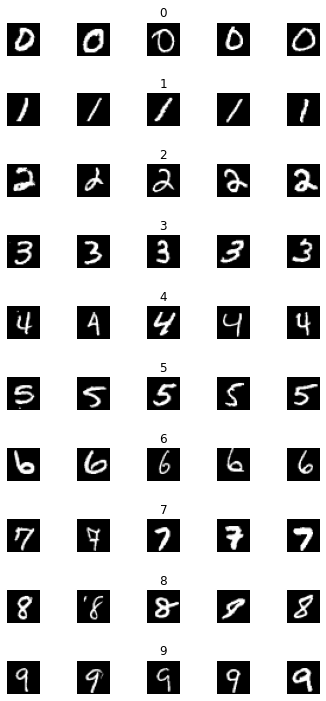

In [ ]:
num_of_samples = []
cols =5
num_classes = 10

fig, ax = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    X_selected = X_train[y_train==j]
    ax[j][i].imshow(X_selected[random.randint(0,len(X_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
    ax[j][i].axis("off")
    if i ==2 :
      ax[j][i].set_title(str(j))
      num_of_samples.append(len(X_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of samples')

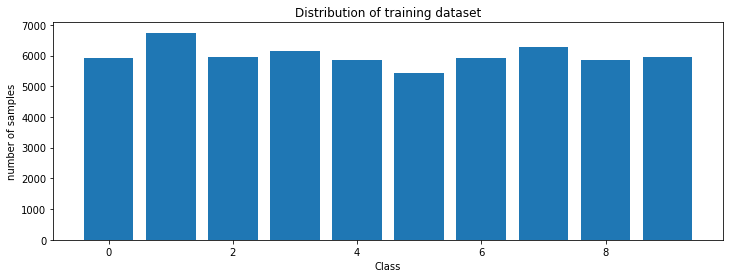

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(num_classes), num_of_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class")
plt.ylabel("number of samples")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
#normalizing the pixel intensities in each pixel. scales down features and reduces variance. low variance helps better deal with input data and learn more quickly.
X_train = X_train/255
X_test = X_test/255

In [ ]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(30, input_dim=num_pixels, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 23,970
Trainable params: 23,970
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.7702 - accuracy: 0.7472 - val_loss: 0.2128 - val_accuracy: 0.9363
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2225 - accuracy: 0.9335 - val_loss: 0.1669 - val_accuracy: 0.9542
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1677 - accuracy: 0.9494 - val_loss: 0.1449 - val_accuracy: 0.9573
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1399 - accuracy: 0.9575 - val_loss: 0.1420 - val_accuracy: 0.9560
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1355 - accuracy: 0.9579 - val_loss: 0.1501 - val_accuracy: 0.9593
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1272 - accuracy: 0.9603 - val_loss: 0.1417 - val_accuracy: 0.9600
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1102 - accuracy: 0.9666 - val_loss: 0.1533 - val_accuracy: 0.9592
Epoch 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/i

Text(0.5, 0, 'epoch')

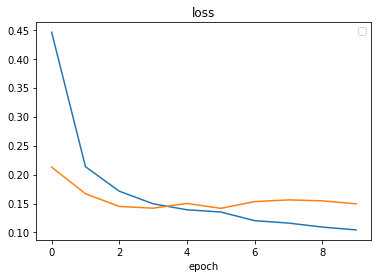

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend('loss', 'val_loss')
plt.title('loss')
plt.xlabel('epoch')

In [ ]:
score=model.evaluate(X_test, y_test, verbose=1)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1629 - accuracy: 0.9546
<class 'list'>
Test score: 0.16285359859466553
Test accuracy: 0.9545999765396118


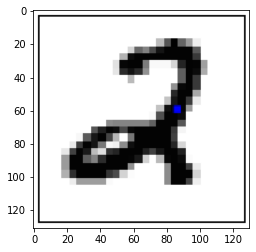

In [ ]:
import requests
from PIL import Image   #from python imaging library import image

url='https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response=requests.get(url, stream=True)     #response stores the raw component as an object now
img = Image.open(response.raw)      #opens the raw content as an image
plt.imshow(img)         

In [ ]:
import cv2
img_array=np.asarray(img)       #convert image into a numpy array sothat we can resize
resized = cv2.resize(img_array, (28, 28))       #resize the image to be similar to what the model was trained on. however this gives shape (28, 28, 4)
gray_scale=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)        #this will convert the array into a 2D array of shape (28, 28)
#now image has white background. but model was trained with black background
image = cv2.bitwise_not(gray_scale)     #effectively inverts the colous
plt.imshow(image, cmap=plt.get_cmap("gray")) 
print(image)

NameError: ignored

In [ ]:
image = image/255       #normalize the image similar to we did for the training image
image=image.reshape(1, 784)     #flatten it just as we did for the training images so that it can be an input into the model to make a prediction

In [ ]:
prediction = model.predict_classes(image)
print(f'predicted image is: {str(prediction)}')

predicted image is: [2]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
